# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # NOTE:  The OpenWeather API is not returning the sys.country attribute for most data points.  So I am pulling it from the citipy library instead
        city_country = citipy.nearest_city(lats[i], lngs[i]).country_code.upper()

        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | ternitz
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | ahmadpur east
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | noshiro
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | grand-bassam
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | pyinmana
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | dunay
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-17.8243,-135.2985,23.34,73,0,10.56,PN,1693061562
1,papatowai,-86.6988,178.9818,-31.39,99,100,6.33,NZ,1693061562
2,ternitz,47.8483,15.8633,27.44,69,97,1.69,AT,1693061562
3,port elizabeth,-88.5962,31.2816,-31.58,100,100,4.34,ZA,1693061563
4,ahmadpur east,28.6977,71.3746,37.58,29,6,3.04,PK,1693061563


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-17.8243,-135.2985,23.34,73,0,10.56,PN,1693061562
1,papatowai,-86.6988,178.9818,-31.39,99,100,6.33,NZ,1693061562
2,ternitz,47.8483,15.8633,27.44,69,97,1.69,AT,1693061562
3,port elizabeth,-88.5962,31.2816,-31.58,100,100,4.34,ZA,1693061563
4,ahmadpur east,28.6977,71.3746,37.58,29,6,3.04,PK,1693061563


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# set the current date variable for use by the scatter plot titles
current_date = time.strftime("%Y-%m-%d")

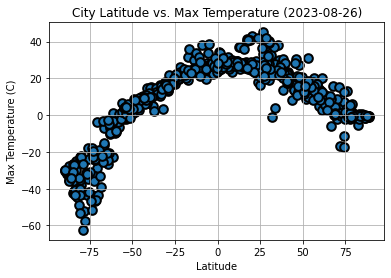

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({current_date})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

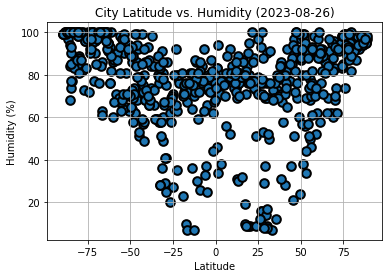

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

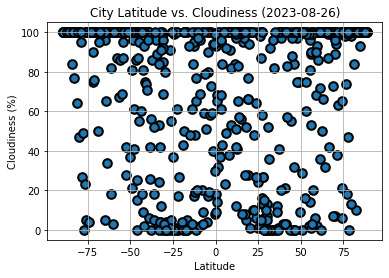

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

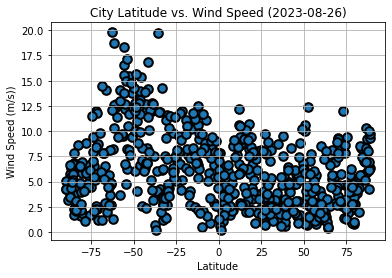

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s))")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots

def compute_and_plot_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # if the slope is negative, add the annotation in the bottom left corner
    # otherwise put it in the bottom right corner
    if (slope < 0):
        line_x = x_values.min()
        line_y = y_values.min()
    else:
        line_x = (x_values.min() + x_values.max()) / 2
        line_y = y_values.min()
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(line_x, line_y), fontsize=15, color="red")
    print(f'The r-value is {rvalue**2}')

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ternitz,47.8483,15.8633,27.44,69,97,1.69,AT,1693061562
4,ahmadpur east,28.6977,71.3746,37.58,29,6,3.04,PK,1693061563
6,noshiro,41.4927,137.6318,23.38,82,3,4.09,JP,1693061563
8,ilulissat,74.2423,-49.7424,-11.14,83,21,7.83,GL,1693061564
12,tolanaro,46.2190,169.2812,13.29,90,84,5.52,RU,1693061565


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-17.8243,-135.2985,23.34,73,0,10.56,PN,1693061562
1,papatowai,-86.6988,178.9818,-31.39,99,100,6.33,NZ,1693061562
3,port elizabeth,-88.5962,31.2816,-31.58,100,100,4.34,ZA,1693061563
5,albany,-84.6904,117.3482,-42.15,100,100,2.09,AU,1693061563
7,west island,-7.5298,85.9967,26.89,77,9,11.09,CC,1693061564


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.744868735245757


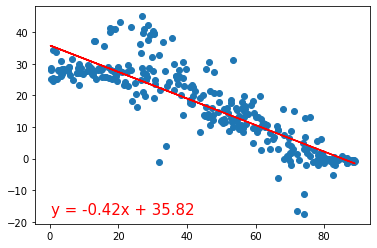

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
compute_and_plot_regression(x_values, y_values)

The r-value is 0.8707790918938579


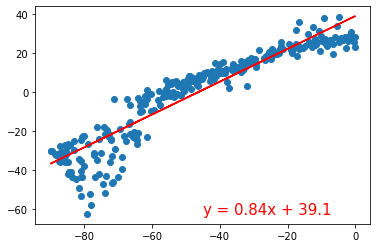

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
compute_and_plot_regression(x_values, y_values)

**Discussion about the linear relationship:**

In both hemispheres, there is a strong correlation (r > 0.7) between temperature and location relative to the equator.  In the northern hemisphere, the r-value is 0.74 and in the souther hemisphere, the r-value is 0.87

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.14946030052535206


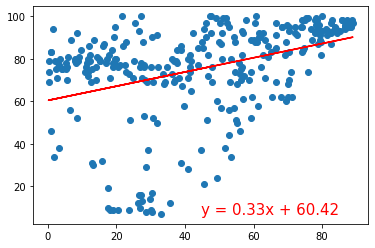

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
compute_and_plot_regression(x_values, y_values)

The r-value is 0.3130217990318114


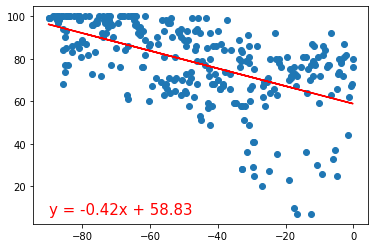

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
compute_and_plot_regression(x_values, y_values)

**Discussion about the linear relationship:** 

In the northern hemisphere (r = 0.15), there is no or a very weak correlation (r < 0.3) between humidity and location relative to the equator.  In the souther hemisphere (r = 0.31), there is a weak correlation (0.3 < r > 0.5) between humidity and location relative to the equator.

So overall, there is no real correlation between humidity and location relative to the equator in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.052566950792487015


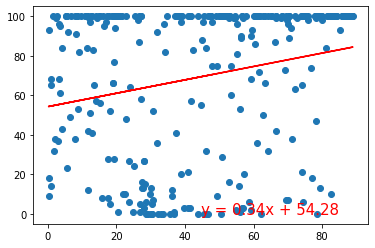

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
compute_and_plot_regression(x_values, y_values)

The r-value is 0.16986107013305646


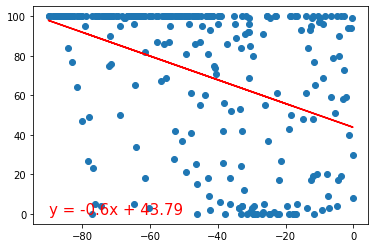

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
compute_and_plot_regression(x_values, y_values)

**Discussion about the linear relationship:**

In both hemispheres (northern r = 0.05; southern r = 0.17) there is no or very weak correlation (r < 0.3) between cloudiness and location relative to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 9.572973306435344e-06


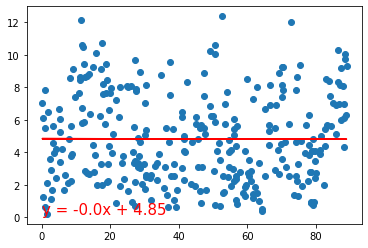

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
compute_and_plot_regression(x_values, y_values)

The r-value is 0.013148956049101832


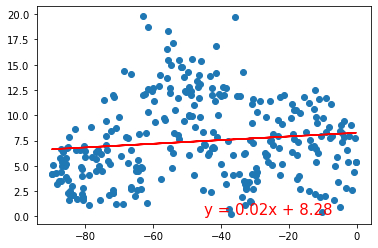

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
compute_and_plot_regression(x_values, y_values)

**Discussion about the linear relationship:**

In both hemispheres (northern r = 0.0000096; southern r = 0.013) there is no correlation (r < 0.3) between wind speed and location relative to the equator.  In fact, in both cases, the r value is essentially 0, which solidifies there is no correlation.